# 1 SymPy前言
是一个用于符号数学的Python库。它旨在成为一个功能齐全的计算机代数系统（CAS），同时保持代码尽可能简单，以便易于理解和易于扩展。SymPy完全用Python编写。
## 1.0 安装
``` shell
pip install sympy
```
## 1.1 练习

In [1]:
from sympy import *
init_session()

IPython console for SymPy 1.3 (Python 3.6.5-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



执行一些简单的SymPy语句

In [2]:
x = Symbol('x')
limit(sin(x)/x,x,0)

# 2 介绍
## 2.1 什么是符号计算？
符号计算以符号方式处理数学对象的计算。这意味着数学对象能够被精确地表示，而不是近似地表示，并且相关变量的数学表达式以符号形式保留。

In [3]:
# 使用内置的Python函数来计算平方根
import math
math.sqrt(9)

In [4]:
math.sqrt(8)

符号计算的真正力量的地方 - 符号结果可以象征性地简化

In [5]:
import sympy
sympy.sqrt(8)

## 2.2 神奇的符号计算
上面的例子展示了如何使用SymPy精确的计算无理数。但是，符号计算系统，远不止于此，CAS还能计算带变量的符号表达式。在SymPy中，变量时使用$symbols$定义的。

让我们定义一个符号表达式，表示数学表达式$x+2y$。

In [6]:
x,y=symbols('x y')
expr=x+2*y
expr

我们上面编写的代码表达式，除了$x、y$不同于普通python变量，其他都一样。但是，区别于普通形式，这里没有输出计算结果，而是输出了数学表达式。现在我们试着操作这个表达式，看看有什么效果？

In [7]:
expr+1

In [8]:
expr-x

在上面的例子中，当我们计算$expr-x$时，我们得到的是$2*y$,而不是$x + 2*y - x$。这里表达式$expr$中的$x$和$-x$自动的抵消掉了。这就像$\sqrt8$自动转换成$2\sqrt2$一样。但是并不是所有情况都会像这样化简的。比如：

In [9]:
x*expr

在这里，我们可能期待$x(x+2y)$ 转化为$x^2+2xy$，但我们看到表达式确没有像我们预期的一样。这是SymPy中经常会出现。除了明显的简化，如$x−x=0 $和$\sqrt8=2\sqrt2$，大多数简化不会自动执行。这是因为$x(x+2y)$和$x^2+2xy$，两种形式在不同情况下都很有用。考虑到这样的情况，在SymPy中，有从一种形式到另一种形式的功能。

In [10]:
expanded_expr=expand(x*expr)
expanded_expr

In [11]:
factor(f=expanded_expr)

## 2.3 符号计算的用途
像SymPy这样的符号计算系统的真正强大之处在于能够象征性地进行各种计算。SymPy可以简化表达式，计算导数，积分和极限，求解方程，使用矩阵等等，并且可以象征性地完成所有操作。它还包括用于绘图，打印的模块(如数学公式的2D漂亮打印输出，或LATEX)，代码生成，物理，统计，组合，数论，几何，逻辑等。下面我们来看一些比较典型的案例：

In [12]:
x,t,z,nu=symbols('x t z nu')

In [13]:
# 导数
diff(sin(x)*exp(x),x)

In [14]:
# 积分
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

In [15]:
# 积分
integrate(sin(x**2), (x, -oo, oo))

In [16]:
# 极限
limit(sin(x)/x, x, 0)

In [17]:
# 求解方程
solve(x**2 - 2, x)

解微分方程:$$- y{\left (t \right )} + \frac{d^{2}}{d t^{2}} y{\left (t \right )} = e^{t}$$

In [18]:
# 解微分方程
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

In [19]:
# 求解矩阵特征值
Matrix([[1, 2], [2, 2]]).eigenvals()

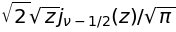

In [20]:
# 依照球面贝塞尔函数的形式，重写贝塞尔函数
besselj(nu, z).rewrite(jn)

用$LATEX$输出$\int_{0}^{\pi} \cos^{2}{\left (x \right )}\, dx$

In [21]:
latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int_{0}^{\\pi} \\cos^{2}{\\left (x \\right )}\\, dx'

## 2.4 为什么选择SymPy？
除此之外，还有许多计算机代数系统。 是什么让SymPy成为比其他选择更好的选择？

首先，SymPy是完全免费的。它是开源的，并且在BSD许可下获得许可，因此您可以修改源代码，甚至可以根据需要进行销售。这与像Maple或Mathematica这样的流行商业系统形成了鲜明的对比，因为后者需要花费数百美元的商业许可证。

其次，SymPy使用Python。大多数计算机代数系统都发明了自己的语言。不像SymPy完全用Python编写，完全用Python执行。这意味着如果您已经了解Python，那么开始使用SymPy要容易得多，因为您已经知道了语法（如果您不了解Python，那么它很容易学习）。我们已经知道Python是一种精心设计，经过实战考验的语言。SymPy开发人员对编写数学软件的能力充满信心，但编程语言设计则完全不同。通过重用现有语言，我们能够专注于那些重要的事情：数学。

其他CAS，比如，Sage也使用Python作为其语言。但Sage很大，下载超过1 GB。SymPy的一个优点是它很轻巧。不仅如此，它除了Python之外没有依赖性，因此它几乎可以在任何地方使用。此外，Sage的目标和SymPy的目标是不同的。Sage旨在成为一个全功能的数学系统，旨在通过将所有主要的开源数学系统合二为一来实现这一目标。当您在Sage中调用某些函数时，例如integrate，它会调用其中包含的一个开源软件包。事实上，SymPy包含在Sage中。另一方面，SymPy旨在成为一个独立的系统，所有功能都在SymPy中实现。

SymPy的最后一个重要特性是它可以用作库。许多计算机代数系统（CAS）专注于在交互式环境中使用，如果您希望自动化或扩展它们，则很难做到。使用SymPy，您可以在交互式Python环境中轻松使用它，或者在您自己的Python应用程序中导入它。SymPy还提供API，以便使用您自己的自定义函数轻松扩展它。
# 3 注意事项
首先，我们应该清楚地了解SymPy。SymPy只不过是一个Python库，像NumPy，Django或者Python标准库模块sys或re。这意味着SymPy不会向Python语言添加任何内容。Python语言中固有的限制也是SymPy中固有的。这也意味着SymPy尽可能尝试使用Python习语，使得熟悉Python编程的人可以轻松地使用SymPy进行编程。
## 3.1 符号
在Python中，变量在定义之前没有任何意义。SymPy也不例外。与您可能使用的许多符号操作系统不同，在SymPy中，变量不是自动定义的。要定义变量，我们必须使用symbols。

In [22]:
x=symbols('x')
x+1

symbols获取由空格或逗号分隔的一串变量名，并从中创建符号。然后我们可以将它们分配给变量名称。现在，让我们只定义最常用的变量名，x，y，和 z，以便本节的其余部分使用。

In [23]:
x,y,z=symbols('x,y,z')

Symbol的名称和它所分配的变量的名称不需要彼此有任何关系。

In [24]:
a,b=symbols('b a')

In [25]:
a

In [26]:
b

通常，最佳做法是将Symbols分配给同名的Python变量。最后，让我们确保理解SymPy符号和Python变量之间的区别。考虑以下：
```python
x = symbols('x')
expr = x + 1
x = 2
print(expr)
```
你认为这段代码的输出是什么？如果你认为3，那你错了。让我们看看到底发生了什么

In [27]:
x = symbols('x')
expr = x + 1
x = 2
print(expr)

x + 1


改变x等于2，没有影响expr。这是因为$x=2$代码，改变python变量x为2，但是并没有影响expr中的SymPy符号x。当我们创建expr时，python变量x还是一个符号，而创建expr之后，我们才把python变量x赋值为2。但是expr仍然保持不变。这不是SymPy独有的。所有Python程序都以这种方式工作：如果更改了变量，则使用该变量创建的表达式不会自动更改。

In [28]:
x='abc'
expr=x+'def'
expr

'abcdef'

In [29]:
x="ABC"
expr

'abcdef'

要更改表达式中符号的值，使用 subs

In [30]:
x = symbols('x')
expr = x + 1
expr.subs(x, y)

In [31]:
expr.subs(x, 2)

## 3.2 等号
等式的符号表达:$x+1=4$

In [32]:
Eq(x+1,4)

一下都是错误的等式符号表达式
```python 
x+1==4
x+1=4
```

假设我们想知道是否$\left(x + 1\right)^{2}=x^{2} + 2 x + 1$。我们可能会尝试这样的事情：

In [33]:
(x + 1)**2 == x**2 + 2*x + 1

False

==代表了精确的结构相等性测试。这里的“精确”意味着只有两个表达式,在结构上完全相等才会相等。这里，$\left(x + 1\right)^{2}$和$x^{2} + 2 x + 1$形式上是不一样的。实际中，当使用SymPy作为库时，测试精确的结构相等性比它代表符号相等或者测试数学相等性更有用。但是，有的时候，尤其是在数学中，您可能会更关心后两者。我们已经看到了等式符号表达方式$Eq$。为了验证两个符号表达式是否相等，基于基本事实$a=b$， 可以得出$a−b=0$。因此，检查$a=b$，可以通过$a−b$的形式简化它，并查看结果是否为0。

In [34]:
a=(x+1)**2
b=x**2+2*x+1
simplify(a-b)

In [35]:
c=x**2-2*x+1
simplify(a-c)

还有一种方法称为$equals$,可以测试两个表达式是否相等。

In [36]:
a.equals(b)

True

In [37]:
a.equals(c)

False

## 3.3 ^和/
SymPy遵循Python的惯例：^表示逻辑异或，使用\*\*取幂。

In [38]:
True ^ False

True

In [39]:
True ^ True

False

无论何时组合SymPy对象和SymPy对象，或者SymPy对象和Python对象，都会得到一个SymPy对象，但是无论何时组合两个Python对象，SymPy都不会发挥作用，因此您将获得一个Python对象。

In [40]:
type(Integer(1) + 1)

sympy.core.numbers.Integer

In [41]:
type(1 + 1)

int

在SymPy中，两个Integers的除法给出了一个Rational对象

In [42]:
Integer(1)/Integer(3)

In [43]:
type(Integer(1)/Integer(3))

sympy.core.numbers.Rational

在Python中/代表整数除法或浮点除法，这取决于你是在Python 2还是Python 3中，并且取决于你是否运行：
```python
from __future__ import division
```

In [44]:
from __future__ import division
1/2

为了避免这种情况，我们可以明确地构造理性对象。

In [45]:
x + Rational(1, 2)

# 4 基本操作
在这里，我们讨论SymPy中表达式操作所需的一些最基本的操作。稍后将在高级表达式操作部分中讨论一些更高级的操作。
## 4.1 替换
您可能想要用数学表达式做的最常见的事情之一是替换。替换将表达式中的所有实例替换为其他内容。它是使用该subs方法完成的。

In [46]:
expr.subs(x,0)

In [47]:
expr

替换通常是出于以下两个原因之一：
1. 在某一点评估表达式。例如，如果我们的表达式是$cos(x) + 1$， 并且我们想要在$x=0$点计算表达式的值，那么我们得到$cos(0) + 1$，即2。

In [48]:
expr = cos(x) + 1
expr.subs(x,0)

2. 用另一个子表达式替换子表达式。我们可能希望这样做有两个原因。第一个是如果我们试图构建一个具有一些对称性的表达式，例如$x^{x^{x^x}}$。为了构建这个，我们一开始的表达式为$x^y$,接着我们用$x^y$替换$y$。然后我们会得到$x^{x^y}$。我们再用$x^y$替换$y$，我们会得到$x^{x^{x^x}}$的表达式。

In [49]:
expr=x**y
expr

In [50]:
expr=expr.subs(y,x**y)
expr

In [51]:
expr=expr.subs(y,x**x)
expr

第二个是如果我们想要执行非常有控制的简化，或者可能是SymPy无法做到的简化。例如，说我们有$sin(2x)+cos(2x) $，我们想要更换$sin(2x)$为$2sin(x)cos(x)$。正如我们稍后将要介绍的那样，expand_trig可以实现该功能。但是，这个功能也会扩展$cos(2x)$，这是我们不想要的结果，一种简单的方法就是更换$sin(2x)$为$2sin(x)cos(x)$。

In [52]:
expr=sin(2*x)+cos(2*x)
expand_trig(expr)

In [53]:
expr.subs(sin(2*x),2*sin(x)*cos(x))

关于subs有两点需要注意。首先，SymPy表达式是不可变的。没有任何功能可以就地改变它们。所有函数都将返回新的表达式。

In [54]:
expr=cos(x)
expr.subs(x,0)

In [55]:
expr

另外一点是，要一次执行多个替换，请将对列表传递给。

In [56]:
expr=x**3+4*x*y+z
expr

In [57]:
expr.subs([(x,2),(y,1),(z,2)])

In [58]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
expr

In [59]:
expr.subs([(x**i, y**i) for i in range(5) if i % 2 == 0])

## 4.2 将字符串转换为SymPy表达式
sympify函数（sympify不要混淆 simplify）可用于将字符串转换为SymPy表达式。

In [60]:
str_expr='x**2+3*x-1/2'
expr=sympify(str_expr)
expr

In [61]:
expr.subs(x,3)

## 4.3 evalf
将数值表达式计算为浮点数，

In [62]:
expr=sqrt(8)
expr.evalf()

SymPy可以将浮点表达式计算为任意精度。默认情况下，使用15位精度，但您可以将任何数字作为参数传递给evalf。让我们计算前100位数π。

In [63]:
pi.evalf(100)

为了在一个点上用符号数值计算表达式，我们可能会使用 subs后跟evalf，但是将替换值传递给evalf使用subs标记的对象更高效和数值稳定。

In [64]:
expr=cos(2*x)
expr.evalf(subs={x:2.4})

有时候，舍入误差小于计算表达式值的所需精度。通过将chop标志设置为True，可以删除这些数字。

In [65]:
one=cos(1)**2+sin(1)**2
(one-1).evalf()

In [66]:
(one-1).evalf(chop=True)

## 4.4 lambdify
subs和evalf适合做简单的表达式计算，但如果你打算在多个点来计算一个表达式，有更有效的办法。比如说，如果你想要在一千个点上计算一个表达式，在只关心机器精度的情况下，使用SymPy会比NumPy和SciPy这样的库慢的多。

将SymPy表达式转换为可以进行数值计算的表达式，最简单方法是使用lambdify函数。lambdify就像一个lambda函数一样，将运算交由指定计算库（通常为numpy）。

In [67]:
import numpy as np
a = np.arange(10)
expr=sin(x)
f=lambdify(x,expr,'numpy')
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

您可以使用除NumPy之外的其他库。例如，要使用标准库数学模块，请使用"math"。

In [68]:
f=lambdify(x,expr,'math')
f(.1)

要将lambdify与其不知道的数值库一起使用，可以传递字典{sympy_name:numerical_function}。

In [69]:
def mysin(x):
    return x+1
f=lambdify(x,expr,{"sin":mysin})
f(.1)

# 5 格式化输出
## 5.1 自动输出设置
```python 
from sympy import init_printing
init_printing()
```
或者
```python
from sympy import init_session
init_session()
These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()
```
如果明确不使用$LATEX$，那么设置参数use_latex=False给init_printing() 或init_session()。要明确不使用Unicode，那么设置参数use_unicode=False。
## 5.2 特定输出函数
* str
* srepr
* ASCII pretty printer
* Unicode pretty printer
* LaTeX
* MathML
* Dot

### 5.2.1 str
使用$str(expr)$或者$print(expr)$方法,可以获取表达式的字符串格式。表达式的字符串便于阅读。另外，由于表达式的字符串是正确的python代码，我们可以方便的对python代码进行复制粘贴。$str()$表达式的形式通常与输入表达式完全相同。

In [70]:
str(Integral(sqrt(1/x),x))

'Integral(sqrt(1/x), x)'

In [71]:
print(Integral(sqrt(1/x),x))

Integral(sqrt(1/x), x)


### 5.2.2 srepr 
表达式的srepr形式主要是为了显示表达式的准确形式。我们将在高级表达式操作部分中进行详细介绍。要获得srepr形式，使用srepr()函数。

In [72]:
srepr(Integral(sqrt(1/x), x))

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

srepr形式主要用于理解表达式是如何在内部构建的。

### 5.2.3 ASCII
pprint()函数获得表达式的ASCII形式。如果终端环境不支持Unicode，那么函数默认使用ASCII格式。否则的话，需要设置参数use_unicode=False。

In [73]:
pprint(Integral(sqrt(1/x), x),use_unicode=False)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


In [74]:
# 获得外观表达式的字符串
pretty(Integral(sqrt(1/x), x), use_unicode=False)

'  /          \n |           \n |     ___   \n |    / 1    \n |   /  -  dx\n | \\/   x    \n |           \n/            '

In [75]:
print(pretty(Integral(sqrt(1/x), x), use_unicode=False))

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


### 5.2.4 Unicode
pprint()函数也可以获得表达式的Unicode输出形式。如果终端环境支持Unicode，那么会自动使用这种输出形式。如果函数无法检测到终端环境是否支持Unicode，那么可以设置use_unicode=True，强制函数使用Unicode。

In [76]:
pprint(Integral(sqrt(1/x), x),use_unicode=True)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


In [77]:
# 获得外观表达式的字符串
pretty(Integral(sqrt(1/x), x), use_unicode=True)

'⌠           \n⎮     ___   \n⎮    ╱ 1    \n⎮   ╱  ─  dx\n⎮ ╲╱   x    \n⌡           '

In [78]:
print(pretty(Integral(sqrt(1/x), x), use_unicode=True))

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


### 5.2.5 $LATEX$
使用latex()函数，获得表达式的$LATEX$输出

In [79]:
print(latex(Integral(sqrt(1/x), x)))

\int \sqrt{\frac{1}{x}}\, dx


$\int \sqrt{\frac{1}{x}}\, dx$

### 5.2.6 MATHML
数学标记语言（Mathematical Markup Language，MathML），是一种基于XML的标准，用来描述数学符号和公式。

In [80]:
from sympy.printing.mathml import print_mathml,mathml
print(mathml(Integral(sqrt(1/x))))
print('-'*18)
print_mathml(Integral(sqrt(1/x)))

<apply><int/><bvar><ci>x</ci></bvar><apply><root/><apply><power/><ci>x</ci><cn>-1</cn></apply></apply></apply>
------------------
<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



### 5.2.7 Dot
sympy.printing.dot模块下的dotprint()函数，将表达式输出为点格式。点格式可以使用Graphviz进行渲染。Graphviz （英文：Graph Visualization Software的缩写）是一个由AT&T实验室启动的开源工具包，用于绘制DOT语言脚本描述的图形。

In [81]:
from sympy.printing.dot import dotprint
print(dotprint(x+2))

digraph{

# Graph style
"ordering"="out"
"rankdir"="TD"

#########
# Nodes #
#########

"Add(Integer(2), Symbol(x))_()" ["color"="black", "label"="Add", "shape"="ellipse"];
"Integer(2)_(0,)" ["color"="black", "label"="2", "shape"="ellipse"];
"Symbol(x)_(1,)" ["color"="black", "label"="x", "shape"="ellipse"];

#########
# Edges #
#########

"Add(Integer(2), Symbol(x))_()" -> "Integer(2)_(0,)";
"Add(Integer(2), Symbol(x))_()" -> "Symbol(x)_(1,)";
}


# 6 简化
## 6.1 simplify
接下来我们做一些有意思的实验。数学符号计算最有用的特征之一是简化数学表达式的能力。SymPy具有许多功能来执行各种简化。还有一个通用函数 simplify()，它试图以智能方式应用所有这些函数，以获得最简单的表达形式。

In [82]:
simplify(sin(x)**2+cos(x)**2)

In [83]:
simplify((x**3+x**2-x-1)/(x**2+2*x+1))

In [84]:
simplify(gamma(x)/gamma(x-2))

我们看到simplify() 能够处理大量的表达式。它只是应用SymPy中的所有主要简化操作，并使用启发式方法来确定最简单的结果。但“最简单”并不是一个定义明确的术语。例如，假设我们想“简化”$x^{2} + 2 x + 1$为$\left(x + 1\right)^{2}$。

In [85]:
simplify(x**2+2*x+1)

我们没有得到我们想要的东西。符合我们预期的简化功能是factor()函数，我们稍后讨论。

另外，simplify()函数的相对来说效率不如特定的简化函数，因为它在选择最佳之前尝试了多种简化。所以说，如果我们已知需要用哪种简化，那么最好直接使用特定的简化函数。

应用特定的简化函数而不是simplify()还具有以下优点：特定函数对其输出的形式具有某些保证。例如，factor()当在具有有理系数的多项式上调用时，保证将多项式分解为不可约因子。而simplify()确没有保证。这完全是启发式的，而且，正如我们上面所看到的，它甚至可能错过了SymPy能够做的一种可能的简化。
simplify()的最佳实践：当你想把表达式简化为简单的形式，但是不知道这种简单形式是什么的时候，你可以使用simplify()获得一些参考结果，然后选择特定的简化函数，以获得更精确的结果。
## 6.2 多项式、有理式函数简化
### 6.2.1 expand-表达式展开
expand()函数是SymPy的一个最常用的简化函数。虽然，expand()函数还有很多其他功能，这里，我们只看它-多项式表达式展开的功能。

在数学中，由若干个单项式相加组成的代数式叫做多项式（若有减法：减一个数等于加上它的相反数）。多项式中的每个单项式叫做多项式的项，这些单项式中的最高项次数，就是这个多项式的次数。其中多项式中不含字母的项叫做常数项。

In [86]:
expr=(x+1)**2
expand(expr)

In [87]:
expand((x+2)*(x+3))

对于指定的多项式，expand()函数将其转换为一组单项式的组合的标准形式。

expand()函数可能听起来不像简化功能。毕竟无论从名字还是案例来看，它是表达式的长度更大，而不是更小。但是通常的情况是，一个表达式通过expand()函数消减之后变得比以前要简化了。

In [88]:
expand((x+1)*(x-2)-x*(x-1))

### 6.2.2 factor-因式分解
factor()函数将一个多项式因式转化为有理数上不可约的因式。

多项式被另一多项式整除,后者即是前者的因式，如果多项式 f(x) 能够被整式 g(x) 整除，即可以找出一个多项式 q(x) ，使得 f(x)=q(x)·g(x)，那么g(x) 就叫做 f(x) 的一个因式。当然，这时 q(x) 也是 f(x) 的一个因式，并且 q(x) 、g(x) 的次数都不会大于 f(x) 的次数。

In [89]:
factor(x**3-x**2+x-1)

对于多项式来说，factor()和expand()是相对立的。factor在有理数上使用完整的多因式策略，这意味着每一个因式都是不可简化的。

factor_list返回更结构化的输出。

In [90]:
factor_list(x**3-x**2+x-1)

严格上来说，factor()和expand()的输入项不必是多项式。它们将智能的转化任何类型的表达式。

In [91]:
expand((cos(x)+sin(x))**2)

In [92]:
factor(sin(x)**2 + 2*sin(x)*cos(x) + cos(x)**2)

### 6.2.3 cellect-合并同类项
将多项式中，共同次幂的项合并在一起。

In [93]:
expr=x*y+x-3+2*x**2-z*x**2+x**3
expr

In [94]:
collected_expr=collect(expr,x)
collected_expr

collect()结合.coeff()方法能够得到指定次幂的系数。

In [95]:
collected_expr.coeff(x,2)

### 6.2.4 cancel-分式化简
分式化简函数的名称是cancel，cancel()函数能够将任何有理函数转化为规范的分式形式-$\frac{p}{q}$，其中p和q是没有共同因子的扩展多项式，并且p和q的系数为整数。

一般指在物理化学数学等理工科中把复杂式子化为简单式子的过程 　分式化简称为约分。

In [96]:
cancel((x**2+2*x+1)/(x**2+x))

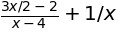

In [97]:
expr=1/x+(3*x/2-2)/(x-4)
expr

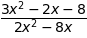

In [98]:
cancel(expr)

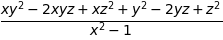

In [99]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

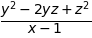

In [100]:
cancel(expr)

既然factor()会完全分解表达式的分子和分母，它也可以用来做同样的事情：

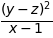

In [101]:
factor(expr)

如果您只想确保表达式处于分式化简，cancel()则效率更高factor()。

### 6.2.5 apart -分式裂项
分式裂项函数的名称是apart，它能将一个分式分解为几个分式的和、差。且分解出来的分式，都是最简形式。

裂项法，这是分解与组合思想在数列求和中的具体应用。是将数列中的每项（通项）分解，然后重新组合，使之能消去一些项，最终达到求和的目的。 通项分解（裂项）倍数的关系。

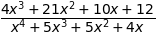

In [102]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

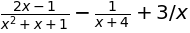

In [103]:
apart(expr)

## 6.3 三角函数简化
SymPy遵循Python的反三角函数的命名约定，即将函数附加a到函数名称的前面。例如，调用反余弦为acos()。

In [104]:
acos(x)

In [105]:
cos(acos(x))

In [106]:
asin(1)

### 6.3.1 trigsimp-三角化简
由三角函数组成的表达式，可以使用trigsimp函数来化简。

In [107]:
trigsimp(sin(x)**2+cos(x)**2)

In [108]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [109]:
trigsimp(sin(x)*tan(x)/sec(x))

trigsimp() 也适用于双曲线三角函数。

In [110]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [111]:
trigsimp(sinh(x)/tanh(x))

与simplify相似的是，trigsimp对输入的表达式应用多种三角变换公式，使用启发式的方法来返回“最好”的那一个。

### 6.3.2 expand_trig-三角展开
要展开三角函数，可以使用expand_trig函数，它能够使用三角恒等式，将三角表达式展开。

In [112]:
expand_trig(sin(x+y))

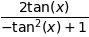

In [113]:
expand_trig(tan(2*x))

expand_trig()与trigsimp()相对立。

In [114]:
trigsimp(expand_trig(sin(x+y)))

In [115]:
trigsimp(expand_trig(tan(2*x)))

## 6.4 Powers-指数
我们先了解一下，指数的特征：
1. $x^{a} y^{b}=x^{a + b}$
2. $x^{a} y^{a}=\left(x y\right)^{a}$
3. $\left(x^{a}\right)^{b}=x^{a b}$
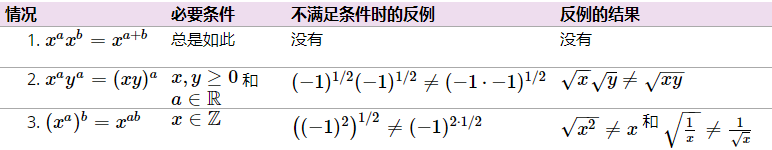

正如上面提到的，为了使SymPy执行涉及仅在某些前提条件下的简化，我们需要对我们的符号进行所属集合的设定。
* 默认情况下，SymPy的符号所属集合为$C$-复数集合。也就是说，除非表达式中的符号所属集合为$C$，否则该表达式的简化不会成功。
* 可以通过symbols函数，指定不同符号的所属集合。后面，我们指定x和y属于正数集合，a和b属于实数集合，z,t,c属于复数集合。

In [116]:
x,y=symbols('x,y',positive=True)
a,b=symbols('a,b',real=True)
z,t,c=symbols('z,t,c')

### 6.4.1 powsimp-指数化简
若表达式中存在指数可以化解的情况，可以使用powsimp函数。 指数化简包含合并指数和合并基底两种情况。

In [117]:
powsimp(x**a*x**b)

In [118]:
powsimp(x**a*y**a)

对于合并基底(第二种情况)，要满足一定的条件才能够进行。首先，x，y需为正，且a需为实数。

In [119]:
powsimp(a**x*b**x)

如果想在不修改符号所属集合的情况下，继续进行指数化简，可以设置force=True。这样，可以强制简化。

In [120]:
powsimp(a**x*b**x,force=True)

### 6.4.2 expand_power_exp / expand_power_base-指数、基底展开
与指数化简相对的，是指数展开，同样地，指数展开包含两个部分，指数展开与基底展开。其中，指数展开对应的函数为expand_power_exp，基底展开对应的函数为expand_power_base。

In [121]:
expand_power_exp(x**(a+b))

In [122]:
expand_power_base((x*y)**a)

同样，对于展开基底(第二种情况)，要满足一定的条件才能够进行。首先，x，y需为正，且a需为实数。

In [123]:
expand_power_base((z*t)**c)

In [124]:
expand_power_base((z*t)**c,force=True)

### 6.4.5 powdenest-指数的指数化简
对于表达式$\left(x^{a}\right)^{b}$,含有两层指数，可以通过使用powdenest函数，将其简化为一层的结构。

In [125]:
powdenest((x**a)**b)

In [126]:
powdenest((z**a)**b)

In [127]:
powdenest((z**a)**b,force=True)

## 6.5 对数
SymPy和python以及大部分程序语言一样，log指的是自然对数，也成为ln。SymPy将其等同看待。

In [128]:
ln(x)

对数和指数有类似的特征，如下：
1. $\log{\left (x y \right )}=\log{\left (x \right )} + \log{\left (y \right )}$
2. $\log{\left (x^{n} \right )}=n \log{\left (x \right )}$

$x,y\in{N*}$

$n\in R$

In [129]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

### 6.5.1 expand_log-对数展开

In [130]:
expand_log(log(x*y))

In [131]:
expand_log(log(x/y))

In [132]:
expand_log(log(x**2))

In [133]:
expand_log(log(x**n))

In [134]:
expand_log(log(z*t))

In [135]:
expand_log(log(z*t),force=True)

### 6.5.2 logcombine-对数合并
与对数展开相对应地，是对数合并操作，函数名称为logcombine。
符号变量需要满足上面同样的条件。

In [136]:
logcombine(log(x)+log(y))

In [137]:
logcombine(n*log(x))

In [138]:
logcombine(n*log(z))

In [139]:
logcombine(n*log(z),force=True)

### 6.6 特殊函数
重新定义符号变量

In [140]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

阶乘函数factorial

In [141]:
factorial(n)

In [142]:
binomial(n, k)

与阶乘函数密切相关的伽玛函数

In [143]:
gamma(z)

In [144]:
# 普通的超几何函数
hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

## 6.7 重写 
特殊函数的经常用到重写函数。重写的形式为expr.rewrite(func).

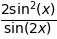

In [145]:
tan(x).rewrite(sin)

In [146]:
factorial(n).rewrite(gamma)

## 6.8 expand_func

In [147]:
expand_func(gamma(x+3))

## 6.9 hyperexpand
将hyper函数用标准函数重写

In [148]:
hyperexpand(hyper([1,1],[2],z))

## 6.10 combsimp
简化组合表达式

In [149]:
n,k=symbols("n,k",integer=True)
combsimp(factorial(n)/factorial(n-3))

In [150]:
combsimp(binomial(n+1, k+1)/binomial(n, k))

# 7 微积分
主要介绍如何在SymPy中执行基本的微积分任务，例如导数，积分，极限和无穷级数。
## 7.1 导数
求导数的函数为diff()。

In [151]:
diff(cos(x),x)

In [152]:
diff(exp(x**2),x)

diff可以通过设置参数的形式，可以求多次导。

In [153]:
diff(x**4,x,x,x)

In [154]:
diff(x**4,x,3)

diff还可以同时对多个变量求多次导。只需要按照求导顺序设置参数即可。

In [155]:
expr=exp(x*y*z)
expr

In [156]:
diff(expr,x,y,y,z,z,z,z)

In [157]:
diff(expr,x,y,2,z,4)

In [158]:
expr.diff(x,y,2,z,4)

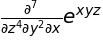

In [159]:
deriv=Derivative(expr,x,y,2,z,4)
deriv

In [160]:
deriv.doit()

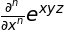

In [161]:
expr.diff((x,n))

## 7.2 积分
计算表达式积分，使用integrate函数。有两种形式的积分，分别是定积分和不定积分。不定积分和导数互为逆运算，使用方法与diff函数一样，只需要传入表达式和自变量即可。

In [162]:
integrate(cos(x),x)

In [163]:
integrate(exp(-x),(x,0,oo))

In [164]:
integrate(exp(-x**2-y**2),(x,-oo,+oo),(y,-oo,+oo))

如果integrate无法计算积分，那么返回积分形式。

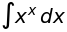

In [165]:
integrate(x**x,x)

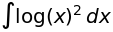

In [166]:
expr=Integral(log(x)**2,x)
expr

In [167]:
expr.doit()

## 7.3 极限
SymPy使用limit函数计算符号表达式的极限。求极限表达式为：$\lim_{x \to x_0} f{\left (x \right )}$

In [168]:
limit(sin(x),x,0)

In [169]:
expr=x**2/exp(x)
expr

In [170]:
expr.subs(x,oo)

In [171]:
expr.limit(x,oo)

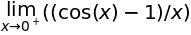

In [172]:
expr=Limit((cos(x)-1)/x,x,0)
expr

In [173]:
expr.doit()

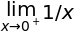

In [174]:
expr=Limit(1/x,x,0)
expr

In [175]:
expr.doit()

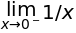

In [176]:
expr=Limit(1/x,x,0,'-')
expr

In [177]:
expr.doit()

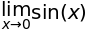

In [178]:
expr=Limit(sin(x),x,0,'+-')
expr

In [179]:
limit(sin(x),x,0,'+-')

```python
limit(1/x,x,0,'-+')
>>> error
```

## 7.4 级数展开
SymPy可以计算表达式在某个点渐进级数展开式。比如说，计算$f(x)$在点$x=x_0$级数展开式，可以使用$f(x).series(x,x_0,n)$。其中$x_0和n$是可以省略，默认情况下，$x_0=0，n=6$

In [180]:
expr=exp(sin(x))
expr.series(x,0,4)

$O(x^4)$表示最后一个的意思，指的是所有x项的幂次大于或等于$x^4$被省略。可以在外部创建和操作这种表达式形式，表达式会自动省略高次幂。

In [181]:
x+x**3+x**6+O(x**4)

In [182]:
expr.series(x,0,4).removeO()

In [183]:
exp(x-6).series(x,x0=6)

# 8 解方程
## 8

我们知道，在SymPy中符号方程等式，不能使用=或者==号，应该使用Eq函数。
还有一种更简单的方法。

In [184]:
Eq(x,y)

In [185]:
solveset(Eq(x**2,1),x)

In [186]:
solveset(Eq(x**2-1,0),x)

In [187]:
solveset(x**2-1,x)

从上面可以看到，如果等式等于零，那么可以使用$solveset(expr,x)代替solveset(Eq(expr,0),x)$.
### 8.1 解代数方程
求解代数方程的主要函数是solveset。solveset函数的语法是，solveset(equation,variable=None,domain=S.Complexes),equation可以是Eq实例形式或者是等于零的表达式。

需要注意的是，还有一个函数solve，也是用于求解方程式的，语法为，solve(equation,variable)。通常情况下，推荐使用solveset函数。

当求解单个方程式时，solveset的输出，有多种形式，如下：

In [188]:
solveset(x**2-x,x)

In [189]:
solveset(x-x,x,domain=S.Reals)

In [190]:
solveset(sin(x)-1,x,domain=S.Reals)

如果代数方程没有解，那么返回一个空集合

In [191]:
solveset(exp(x),x)

如果不能找到解，那么返回一个条件集合。

In [192]:
solveset(cos(x)-x,x)

在solveset模块中，使用linsolve求解线性方程组。

In [193]:
# 方程列表形式
linsolve([x+y+z-1,x+y+2*z-3],(x,y,z))

In [194]:
# 增强矩阵形式
linsolve(Matrix(([1,1,1,1],[1,1,2,3])),(x,y,z))

In [195]:
# A*x=b 形式
M=Matrix(((1,1,1,1),(1,1,2,3)))
system=A,b=M[:,:-1],M[:,-1]
linsolve(system,(x,y,z))

在solveset模块中，使用nonlinsovle求解非线性方程组。

In [196]:
# 当只有实数解时
a,b,c,d=symbols('a,b,c,d',real=True)
nonlinsolve([a**2+a,a-b],[a,b])

In [197]:
nonlinsolve([x*y-1,x-2],[x,y])

In [198]:
# 当解为复数时
nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

In [199]:
# 解为复数和实数的混合
nonlinsolve([x**2-2*y**2-2,x*y-2],[x,y])

In [200]:
nonlinsolve([x*y,x*y-x],[x,y])

In [201]:
nonlinsolve([x**2+x*z,x-y],[x,y])

## 8.2 求解微分方程
使用dsolve求解微分方程。第一步，需要创建一个未定义的函数。

In [202]:
f,g=symbols('f,g',cls=Function)

f和g是未定义的函数。

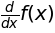

In [203]:
f(x).diff(x)

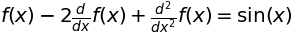

In [204]:
diffeq=Eq(f(x).diff(x,2)-2*f(x).diff(x)+f(x),sin(x))
diffeq

In [205]:
dsolve(diffeq,f(x))

In [206]:
dsolve(f(x).diff(x)*(1-sin(f(x))),f(x))

# 9 矩阵
在SymPy中，创建矩阵，需要使用Matrix对象。通过提供构成矩阵的行向量列表来构造矩阵。矩阵形式如：$\left[\begin{matrix}1 & -1\\3 & 4\\0 & 2\end{matrix}\right]$

In [207]:
Matrix([[1,-1],[3,4],[0,2]])

⎡1  -1⎤
⎢     ⎥
⎢3  4 ⎥
⎢     ⎥
⎣0  2 ⎦

In [208]:
Matrix(range(4))

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [209]:
M=Matrix([[1,2,3],[3,2,1]])
N=Matrix([0,1,1])
M*N

⎡5⎤
⎢ ⎥
⎣3⎦

## 9.1 基本操作
### 9.1.1 形状

In [210]:
M

⎡1  2  3⎤
⎢       ⎥
⎣3  2  1⎦

In [211]:
M.shape

### 9.1.2  访问行和列

In [212]:
M.row(0)

[1  2  3]

In [213]:
M.col(-1)

⎡3⎤
⎢ ⎥
⎣1⎦

In [214]:
M[0,:]

[1  2  3]

In [215]:
M[:,-1]

⎡3⎤
⎢ ⎥
⎣1⎦

### 9.1.3 删除和插入行和列

In [216]:
M.col_del(0)

In [217]:
M

⎡2  3⎤
⎢    ⎥
⎣2  1⎦

In [218]:
M.row_del(1)

In [219]:
M

[2  3]

In [220]:
M=M.row_insert(1,Matrix([[0,4]]))
M

⎡2  3⎤
⎢    ⎥
⎣0  4⎦

In [221]:
M=M.col_insert(0,Matrix([1,-2]))

In [222]:
M

⎡1   2  3⎤
⎢        ⎥
⎣-2  0  4⎦

## 9.2  基本方法

In [223]:
M=Matrix([[1,3],[-2,3]])
N=Matrix([[0,3],[0,7]])

In [224]:
M+N

⎡1   6 ⎤
⎢      ⎥
⎣-2  10⎦

In [225]:
3*M

⎡3   9⎤
⎢     ⎥
⎣-6  9⎦

In [226]:
M**2

⎡-5  12⎤
⎢      ⎥
⎣-8  3 ⎦

In [227]:
M**-1

⎡1/3  -1/3⎤
⎢         ⎥
⎣2/9  1/9 ⎦

In [228]:
M=Matrix([[1,2,3],[3,2,1]])
M

⎡1  2  3⎤
⎢       ⎥
⎣3  2  1⎦

In [229]:
M.T

⎡1  3⎤
⎢    ⎥
⎢2  2⎥
⎢    ⎥
⎣3  1⎦

## 9.3 初始化矩阵

In [230]:
eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [231]:
zeros(2,3)

⎡0  0  0⎤
⎢       ⎥
⎣0  0  0⎦

In [232]:
ones(3,2)

⎡1  1⎤
⎢    ⎥
⎢1  1⎥
⎢    ⎥
⎣1  1⎦

In [233]:
diag(1,2,3)

⎡1  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  3⎦